# Analysis of Traffic Violations by Gender. Data from the Rio de Janeiro government, 2024.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('2.1-infracoes-por-sexo_idade-24.csv', sep=';')
data.head()

,ANOMES,DESC_INF,SEXO_ARQ,FAIXA,DESCR_MUNIC_INF,LIT_PTO,TIPO,AIT
0,202401,DIRIGIR VEICULO SEM POSSUIR CNH/PPD/ACC,0,NÃO INFORMADO,ARMACAO DOS BUZIOS,GRAVISSIMA,MANUAL,3
1,202401,DIRIGIR VEICULO SEM POSSUIR CNH/PPD/ACC,0,NÃO INFORMADO,ARMACAO DOS BUZIOS,GRAVISSIMA,PALM TOP,27
2,202401,DIRIGIR VEICULO SEM POSSUIR CNH/PPD/ACC,0,NÃO INFORMADO,IGUABA GRANDE,GRAVISSIMA,MANUAL,7
3,202401,DIRIGIR VEICULO SEM POSSUIR CNH/PPD/ACC,0,NÃO INFORMADO,IGUABA GRANDE,GRAVISSIMA,PALM TOP,10
4,202401,DIRIGIR VEICULO SEM POSSUIR CNH/PPD/ACC,0,NÃO INFORMADO,MACUCO,GRAVISSIMA,MANUAL,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284128 entries, 0 to 284127
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ANOMES           284128 non-null  int64 
 1   DESC_INF         284128 non-null  object
 2   SEXO_ARQ         284128 non-null  object
 3   FAIXA            284128 non-null  object
 4   DESCR_MUNIC_INF  284128 non-null  object
 5   LIT_PTO          284128 non-null  object
 6   TIPO             284128 non-null  object
 7   AIT              284128 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.3+ MB


In [21]:
data.isna().sum()

ANOMES             0
DESC_INF           0
SEXO_ARQ           0
FAIXA              0
DESCR_MUNIC_INF    0
LIT_PTO            0
TIPO               0
AIT                0
dtype: int64

In [22]:
data.isnull().sum()

ANOMES             0
DESC_INF           0
SEXO_ARQ           0
FAIXA              0
DESCR_MUNIC_INF    0
LIT_PTO            0
TIPO               0
AIT                0
dtype: int64

In [23]:
data['FAIXA'].value_counts()

FAIXA
NÃO INFORMADO       52790
DE 41 A 50 ANOS     52505
DE 31 A 40 ANOS     51670
DE 18 A 30 ANOS     44346
DE 51 A 60 ANOS     42832
ACIMA DE 60 ANOS    39985
Name: count, dtype: int64

In [24]:
data['SEXO_ARQ'].value_counts()

SEXO_ARQ
M    153302
F     78036
0     52790
Name: count, dtype: int64

In [ ]:
# Changing gender value 0 to NÃO INFORMADO for clearer visualization.
data.loc[data['SEXO_ARQ'] == '0', 'SEXO_ARQ'] = 'NÃO INFORMADO'

data['SEXO_ARQ'].value_counts()

SEXO_ARQ
M                153302
F                 78036
NÃO INFORMADO     52790
Name: count, dtype: int64

In [ ]:
# Setting a friendly pallete to plot genders
gender_colors = {
    'M': 'lightblue', 
    'F': 'pink', 
    'NÃO INFORMADO': 'grey', 
}

## Analyzing the genders

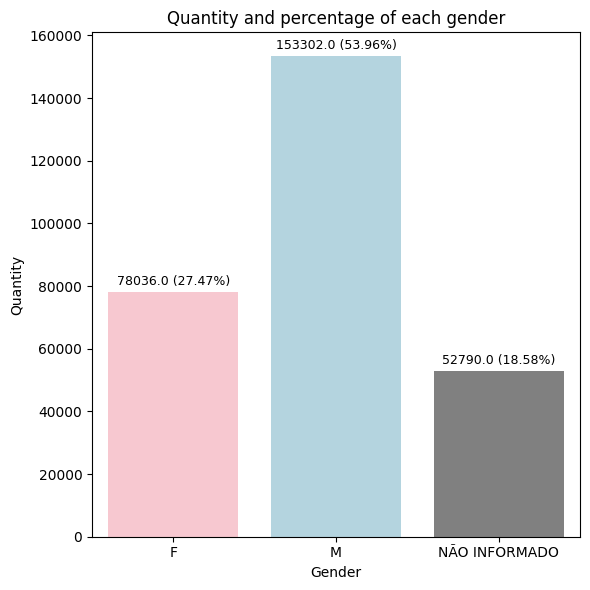

In [11]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=data.sort_values('SEXO_ARQ'), x='SEXO_ARQ', hue='SEXO_ARQ', palette=gender_colors)
for c in ax.containers:
    ax.bar_label(c, labels=[f'{v} ({v * 100 / data['SEXO_ARQ'].value_counts().sum():.2f}%)' for v in c.datavalues], padding=3, fontsize=9)
ax.set_title('Quantity and percentage of each gender')
ax.set_ylabel('Quantity')
ax.set_xlabel('Gender')

plt.tight_layout()
plt.show()

Men are twice as frequent as women. However we have 18.58% of unknow gender. It must be taken in future conclusions

## Analyzing the age groups

In [27]:
data.loc[data['FAIXA'] == 'NÃO INFORMADO', ['FAIXA', 'SEXO_ARQ']].value_counts()

FAIXA          SEXO_ARQ     
NÃO INFORMADO  NÃO INFORMADO    52790
Name: count, dtype: int64

The 'NÃO INFORMADO' age group is only linked to the 'NÃO INFORMADO' gender. It means men and women has a age group defined

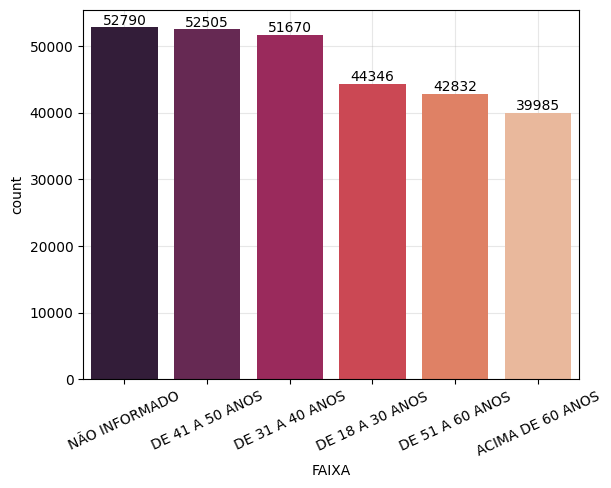

In [13]:
age_group_count = data['FAIXA'].value_counts().reset_index()
ax = sns.barplot(data=age_group_count, x='FAIXA', y='count', hue='FAIXA', palette='rocket')
for c in ax.containers:
    ax.bar_label(c)
ax.grid(True, alpha=0.3)
ax.set_axisbelow(True)
plt.tick_params(axis='x', rotation=25)

Excluding 'NÃO INFORMADO', the graph shows that people between 41 and 50 years committed more traffic violations than others in Rio de Janeiro in 2024. However, i belive this could be wrong. The agents or mechanisms of register traffic violations probably doesn't consider the age, probably just the violation itself is considered, the age loses most relevance.

In [401]:
data['DESC_INF_LIMPA'] = data['DESC_INF'].str.split(',').str[0]

base_contingency = data.loc[:, ['SEXO_ARQ', 'DESC_INF_LIMPA']]

cross_table = base_contingency.pivot_table(index='SEXO_ARQ', columns='DESC_INF_LIMPA', aggfunc=lambda x: len(x), margins=True)

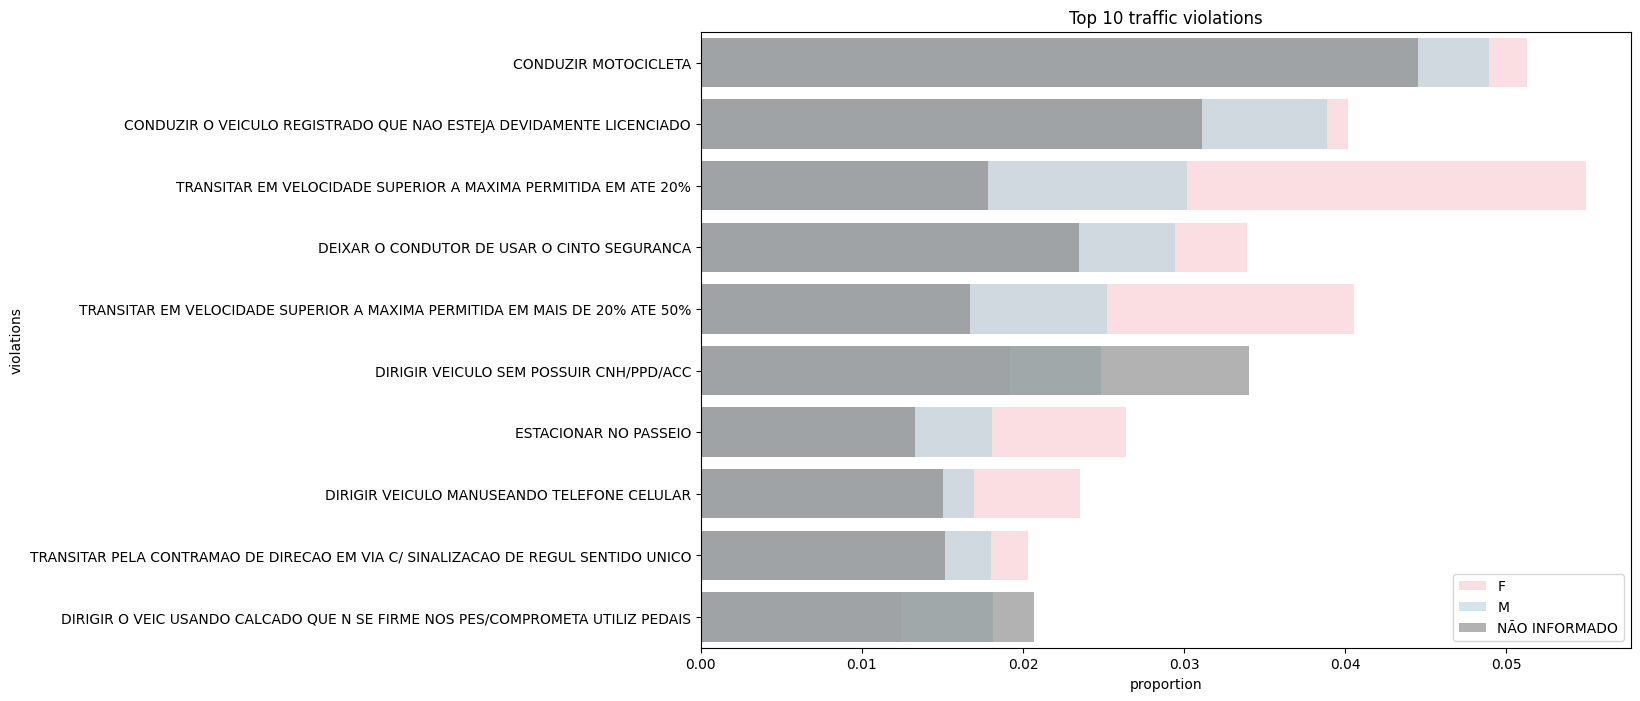

In [405]:
df = cross_table.drop('All',  axis=0)
cols = df.columns[:-1]
df.loc[:, cols] = df.loc[:, cols].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
df = df.fillna(0)


df_plot = df.reset_index().melt(id_vars='SEXO_ARQ', var_name='violations', value_name='proportion')

top_violations = data['DESC_INF_LIMPA'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 8))
sns.barplot(data=df_plot.loc[df_plot['violations'].isin(top_violations)], x='proportion', y='violations', hue='SEXO_ARQ', palette=gender_colors, dodge=False, alpha=0.6, order=top_violations)

plt.legend()
plt.title('Top 10 traffic violations')
plt.show()


The plot above indicates that gender is a factor in the distribution of traffic violations in Rio de Janeiro (2024).
It shows the probability of a specific gender committing a specific violation.
Women had a higher concentration of speeding violations, whereas men showed a broader distribution of infractions, with a notable peak in driving without a license

## Conclusion:

Based on the violation proportions, speeding accounted for a significant portion of infractions among women (approximately 5.5%). This trend represents a high-risk behavior in traffic.
Men had a lot of problems around motorbikes